# SVM - Human Activity Recognition

#### #1: Develop a Support Vector Machine (SVM) using the sci-kit learn module within a single notebook.

In [1]:
#Import Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import utils
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
#Reading TRAINING CSV file of Human Activity Recognition
df_train = pd.read_csv('train.csv')
df_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


In [3]:
#Drop the subject column for training data
df_train.drop(columns= "subject", inplace = True)
df_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,WALKING_UPSTAIRS


In [4]:
#Checking for missing values
val_missing = df_train.isnull().values.any()
print("Values missing:",val_missing)

#Class Distribution
pd.crosstab(index = df_train["Activity"],columns="count")

Values missing: False


col_0,count
Activity,
LAYING,1407
SITTING,1286
STANDING,1374
WALKING,1226
WALKING_DOWNSTAIRS,986
WALKING_UPSTAIRS,1073


In [5]:
#Reading TESTING CSV file of Human Activity Recognition
df_test = pd.read_csv('test.csv')
df_test

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24,WALKING_UPSTAIRS
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24,WALKING_UPSTAIRS
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24,WALKING_UPSTAIRS
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24,WALKING_UPSTAIRS


In [6]:
#Drop the subject column for testing data
df_test.drop(columns= "subject", inplace = True)
df_test

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,WALKING_UPSTAIRS
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,WALKING_UPSTAIRS
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,WALKING_UPSTAIRS
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,WALKING_UPSTAIRS


In [7]:
#Checking for missing values
isMissing = df_train.isnull().values.any()
print("Values missing:",isMissing)

#Class Distribution (labels)
pd.crosstab(index = df_train["Activity"],columns="count")

Values missing: False


col_0,count
Activity,
LAYING,1407
SITTING,1286
STANDING,1374
WALKING,1226
WALKING_DOWNSTAIRS,986
WALKING_UPSTAIRS,1073


In [8]:
#Features and labels
print('Training data:',df_train.shape)
print('Testing data:',df_test.shape)

Training data: (7352, 562)
Testing data: (2947, 562)


**Observations:**  
* Train data set has 562 Columns/features (including the target/class), and 7352 rows or data points. 
* Test data set has 562 Columns/features (including the target/class), and 2947 rows or data points. 
* The target is in the 'Activity' column and it has 6 unique values.
* I have removed the "subject" column since this one isn't a feature. This one serves more like an identifier.

In [9]:
#Assign features and labels
features_train =  df_train.drop(['Activity'], axis=1)
labels_train = df_train['Activity']
features_test =  df_test.drop(['Activity'], axis=1)
labels_test = df_test['Activity']

In [10]:
#Split df_train into training and validation sets
#71% corresponds to training data
#29% corresponds to testing data
#Ratio chosen 51-20-29
x_train, x_valid, y_train, y_valid = train_test_split(features_train, labels_train, test_size=0.2, random_state = 1)

#df_test for testing data
x_test = features_test
y_test = labels_test

print('x_train shape:',x_train.shape)
print('y_train shape:',y_train.shape)
print('x_valid shape:',x_valid.shape)
print('y_valid shape:',y_valid.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:',y_test.shape)

x_train shape: (5881, 561)
y_train shape: (5881,)
x_valid shape: (1471, 561)
y_valid shape: (1471,)
x_test shape: (2947, 561)
y_test shape: (2947,)


#### #2/#3: Use multiple SVMs together for this multiclass problem. Use either the one vs. one or one vs. rest method, and explain what these options mean. Experiment with at least three different values of the C parameter. Explain what this parameter controls. Use the score method to display the accuracy of the training and validation sets for each value you try.

**One vs. One:**  
A primary dataset is split into one binary classification dataset for each pair of classes. Each binary classifier predicts one class label. When we input the test data to the classifier, then the model with the majority counts is concluded as a result.

**One vs. Rest:**  
For the N-class instances dataset, we have to generate the N-binary classifier models. The number of class labels present in the dataset and the number of generated binary classifiers must be the same

**C parameter:**  
Depending on the problem it can accurately classify the points of a data set or keep the boundaries at a significant distance from each other. 

* Large C value =  Focuses on classifying 
* Small C value = Focuses on keeping the lines apart

#### SVM using OVO

In [11]:
#C1 = 0.01
svm_c1 = SVC(C=0.01, decision_function_shape='ovo', random_state=1) 
svm_c1.fit(x_train, y_train)
print('C = 0.01')
print('Training Accuracy: ', svm_c1.score(x_train, y_train))
print('Validation Accuracy: ', svm_c1.score(x_valid, y_valid))
print('Testing Accuracy: ', svm_c1.score(x_test, y_test))
print(' ')

#C2 = 0.1
svm_c2 = SVC(C=0.1, decision_function_shape='ovo', random_state=1) 
svm_c2.fit(x_train, y_train)
print('C = 0.1')
print('Training Accuracy: ', svm_c2.score(x_train, y_train))
print('Validation Accuracy: ', svm_c2.score(x_valid, y_valid))
print('Testing Accuracy: ', svm_c2.score(x_test, y_test))
print(' ')

#C3 = 1
svm_c3 = SVC(C=1, decision_function_shape='ovo', random_state=1) 
svm_c3.fit(x_train, y_train)
print('C = 1')
print('Training Accuracy: ', svm_c3.score(x_train, y_train))
print('Validation Accuracy: ', svm_c3.score(x_valid, y_valid))
print('Testing Accuracy: ', svm_c3.score(x_test, y_test))
print(' ')

#C4 = 5
svm_c4 = SVC(C=5, decision_function_shape='ovo', random_state=1) 
svm_c4.fit(x_train, y_train)
print('C = 5')
print('Training Accuracy: ', svm_c4.score(x_train, y_train))
print('Validation Accuracy: ', svm_c4.score(x_valid, y_valid))
print('Testing Accuracy: ', svm_c4.score(x_test, y_test))
print(' ')

#C5 = 10
svm_c5 = SVC(C=10, decision_function_shape='ovo', random_state=1) 
svm_c5.fit(x_train, y_train)
print('C = 10')
print('Training Accuracy: ', svm_c5.score(x_train, y_train))
print('Validation Accuracy: ', svm_c5.score(x_valid, y_valid))
print('Testing Accuracy: ', svm_c5.score(x_test, y_test))
print(' ')

#C6 = 20
svm_c6 = SVC(C=20, decision_function_shape='ovo', random_state=1) 
svm_c6.fit(x_train, y_train)
print('C = 20')
print('Training Accuracy: ', svm_c6.score(x_train, y_train))
print('Validation Accuracy: ', svm_c6.score(x_valid, y_valid))
print('Testing Accuracy: ', svm_c6.score(x_test, y_test))

C = 0.01
Training Accuracy:  0.6182622003060704
Validation Accuracy:  0.6247450713800136
Testing Accuracy:  0.5758398371224974
 
C = 0.1
Training Accuracy:  0.9173609930283966
Validation Accuracy:  0.9102651257647859
Testing Accuracy:  0.9019341703427214
 
C = 1
Training Accuracy:  0.97517429008672
Validation Accuracy:  0.9741672331747111
Testing Accuracy:  0.9480827960637936
 
C = 5
Training Accuracy:  0.9879272232613501
Validation Accuracy:  0.9877634262406526
Testing Accuracy:  0.9565659993213438
 
C = 10
Training Accuracy:  0.992688318313212
Validation Accuracy:  0.9891230455472467
Testing Accuracy:  0.9636918900576857
 
C = 20
Training Accuracy:  0.995238904948138
Validation Accuracy:  0.9918422841604351
Testing Accuracy:  0.9660671869697998


#### SVM using OVR

In [12]:
""""
#C1 = 0.01
svm_c1 = SVC(C=0.01, decision_function_shape='ovr', random_state=1) 
svm_c1.fit(x_train, y_train)
print('C = 0.01')
print('Training Accuracy: ', svm_c1.score(x_train, y_train))
print('Validation Accuracy: ', svm_c1.score(x_valid, y_valid))
print('Testing Accuracy: ', svm_c1.score(x_test, y_test))
print(' ')

#C2 = 0.1
svm_c2 = SVC(C=0.1, decision_function_shape='ovr', random_state=1) 
svm_c2.fit(x_train, y_train)
print('C = 0.1')
print('Training Accuracy: ', svm_c2.score(x_train, y_train))
print('Validation Accuracy: ', svm_c2.score(x_valid, y_valid))
print('Testing Accuracy: ', svm_c2.score(x_test, y_test))
print(' ')

#C3 = 1
svm_c3 = SVC(C=1, decision_function_shape='ovr', random_state=1) 
svm_c3.fit(x_train, y_train)
print('C = 1')
print('Training Accuracy: ', svm_c3.score(x_train, y_train))
print('Validation Accuracy: ', svm_c3.score(x_valid, y_valid))
print('Testing Accuracy: ', svm_c3.score(x_test, y_test))
print(' ')

#C4 = 5
svm_c4 = SVC(C=5, decision_function_shape='ovr', random_state=1) 
svm_c4.fit(x_train, y_train)
print('C = 5')
print('Training Accuracy: ', svm_c4.score(x_train, y_train))
print('Validation Accuracy: ', svm_c4.score(x_valid, y_valid))
print('Testing Accuracy: ', svm_c4.score(x_test, y_test))
print(' ')

#C5 = 10
svm_c5 = SVC(C=10, decision_function_shape='ovr', random_state=1) 
svm_c5.fit(x_train, y_train)
print('C = 10')
print('Training Accuracy: ', svm_c5.score(x_train, y_train))
print('Validation Accuracy: ', svm_c5.score(x_valid, y_valid))
print('Testing Accuracy: ', svm_c5.score(x_test, y_test))
print(' ')

#C6 = 20
svm_c6 = SVC(C=20, decision_function_shape='ovr', random_state=1) 
svm_c6.fit(x_train, y_train)
print('C = 20')
print('Training Accuracy: ', svm_c6.score(x_train, y_train))
print('Validation Accuracy: ', svm_c6.score(x_valid, y_valid))
print('Testing Accuracy: ', svm_c6.score(x_test, y_test))
""""

C = 0.01
Training Accuracy:  0.6182622003060704
Validation Accuracy:  0.6247450713800136
Testing Accuracy:  0.5758398371224974
 
C = 0.1
Training Accuracy:  0.9173609930283966
Validation Accuracy:  0.9102651257647859
Testing Accuracy:  0.9019341703427214
 
C = 1
Training Accuracy:  0.97517429008672
Validation Accuracy:  0.9741672331747111
Testing Accuracy:  0.9480827960637936
 
C = 5
Training Accuracy:  0.9879272232613501
Validation Accuracy:  0.9877634262406526
Testing Accuracy:  0.9565659993213438
 
C = 10
Training Accuracy:  0.992688318313212
Validation Accuracy:  0.9891230455472467
Testing Accuracy:  0.9636918900576857
 
C = 20
Training Accuracy:  0.995238904948138
Validation Accuracy:  0.9918422841604351
Testing Accuracy:  0.9660671869697998


#### #4: Try the linear, rbf (with different choices of gamma) and polynomial kernels. Comment on which of these works best for your data and why. Use the score method to display the accuracy of the training and validation sets for each option.

#### Linear Kernel

In [13]:
""""
svm_linear = SVC(kernel='linear', C=20, decision_function_shape='ovo', random_state=1) 
svm_linear.fit(x_train, y_train)
print('C = 20')
print('Training Accuracy: ', svm_linear.score(x_train, y_train))
print('Validation Accuracy: ', svm_linear.score(x_valid, y_valid))
print('Testing Accuracy: ', svm_linear.score(x_test, y_test))
""""

C = 20
Training Accuracy:  0.9982996089100493
Validation Accuracy:  0.9898028552005439
Testing Accuracy:  0.9626739056667798


#### Rbf Kernel

In [14]:
""""
print('C = 20')
print(' ')

# Gamma = 0.01
svm_rbf_1 = SVC(kernel='rbf', gamma=0.01, C=20, decision_function_shape='ovo', random_state=1) 
svm_rbf_1.fit(x_train, y_train)
print('Gamma = 0.01')
print('Training Accuracy: ', svm_rbf_1.score(x_train, y_train))
print('Validation Accuracy: ', svm_rbf_1.score(x_valid, y_valid))
print('Testing Accuracy: ', svm_rbf_1.score(x_test, y_test))
print(' ')

# Gamma = 0.1
svm_rbf_2 = SVC(kernel='rbf', gamma=0.1, C=20, decision_function_shape='ovo', random_state=1) 
svm_rbf_2.fit(x_train, y_train)
print('Gamma = 0.1')
print('Training Accuracy: ', svm_rbf_2.score(x_train, y_train))
print('Validation Accuracy: ', svm_rbf_2.score(x_valid, y_valid))
print('Testing Accuracy: ', svm_rbf_2.score(x_test, y_test))
print(' ')

# Gamma = 1
svm_rbf_3 = SVC(kernel='rbf', gamma=1, C=20, decision_function_shape='ovo', random_state=1) 
svm_rbf_3.fit(x_train, y_train)
print('Gamma = 1')
print('Training Accuracy: ', svm_rbf_3.score(x_train, y_train))
print('Validation Accuracy: ', svm_rbf_3.score(x_valid, y_valid))
print('Testing Accuracy: ', svm_rbf_3.score(x_test, y_test))
print(' ')

# Gamma = 10
svm_rbf_4 = SVC(kernel='rbf', gamma=10, C=20, decision_function_shape='ovo', random_state=1) 
svm_rbf_4.fit(x_train, y_train)
print('Gamma = 10')
print('Training Accuracy: ', svm_rbf_4.score(x_train, y_train))
print('Validation Accuracy: ', svm_rbf_4.score(x_valid, y_valid))
print('Testing Accuracy: ', svm_rbf_4.score(x_test, y_test))
""""

C = 20
 
Gamma = 0.01
Training Accuracy:  0.9979595306920592
Validation Accuracy:  0.990482664853841
Testing Accuracy:  0.9647098744485918
 
Gamma = 0.1
Training Accuracy:  1.0
Validation Accuracy:  0.990482664853841
Testing Accuracy:  0.9521547336274178
 
Gamma = 1
Training Accuracy:  1.0
Validation Accuracy:  0.19782460910944935
Testing Accuracy:  0.1849338310145911
 
Gamma = 10
Training Accuracy:  1.0
Validation Accuracy:  0.18558803535010196
Testing Accuracy:  0.18221920597217509


#### Polynomial Kernel

In [15]:
""""
print('C = 20')
print(' ')

# Degree = 2
svm_poly_1 = SVC(kernel='poly', degree=2, C=20, decision_function_shape='ovo', random_state=1) 
svm_poly_1.fit(x_train, y_train)
print('Degree = 2')
print('Training Accuracy: ', svm_rbf_1.score(x_train, y_train))
print('Validation Accuracy: ', svm_rbf_1.score(x_valid, y_valid))
print('Testing Accuracy: ', svm_rbf_1.score(x_test, y_test))
print(' ')

# Degree = 4
svm_poly_2 = SVC(kernel='poly', degree=4, C=20, decision_function_shape='ovo', random_state=1)  
svm_poly_2.fit(x_train, y_train)
print('Degree = 4')
print('Training Accuracy: ', svm_poly_2.score(x_train, y_train))
print('Validation Accuracy: ', svm_poly_2.score(x_valid, y_valid))
print('Testing Accuracy: ', svm_poly_2.score(x_test, y_test))
print(' ')
""""
# Degree = 10
svm_poly_3 = SVC(kernel='poly', degree=10, C=20, decision_function_shape='ovo', random_state=1)  
svm_poly_3.fit(x_train, y_train)
print('Degree = 10')
print('Training Accuracy: ', svm_poly_3.score(x_train, y_train))
print('Validation Accuracy: ', svm_poly_3.score(x_valid, y_valid))
print('Testing Accuracy: ', svm_poly_3.score(x_test, y_test))
print(' ')
""""
# Degree = 20
svm_poly_4 = SVC(kernel='poly', degree=20, C=20, decision_function_shape='ovo', random_state=1)  
svm_poly_4.fit(x_train, y_train)
print('Degree = 20')
print('Training Accuracy: ', svm_poly_4.score(x_train, y_train))
print('Validation Accuracy: ', svm_poly_4.score(x_valid, y_valid))
print('Testing Accuracy: ', svm_poly_4.score(x_test, y_test))
""""

C = 20
 
Degree = 2
Training Accuracy:  0.9979595306920592
Validation Accuracy:  0.990482664853841
Testing Accuracy:  0.9647098744485918
 
Degree = 4
Training Accuracy:  1.0
Validation Accuracy:  0.991162474507138
Testing Accuracy:  0.9670851713607058
 
Degree = 10
Training Accuracy:  1.0
Validation Accuracy:  0.9945615227736234
Testing Accuracy:  0.9511367492365117
 
Degree = 20
Training Accuracy:  0.9971093351470838
Validation Accuracy:  0.9836845683208701
Testing Accuracy:  0.9080420766881574


/etc/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='angle(X,gravityMean)', ylabel='angle(tBodyAccMean,gravity)'>

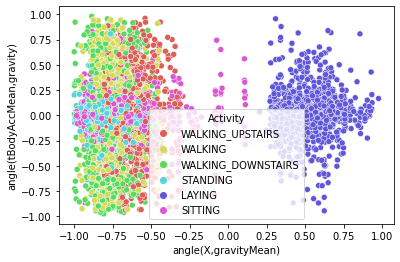

In [16]:
sb.scatterplot(x_train["angle(X,gravityMean)"], x_train["angle(tBodyAccMean,gravity)"], y_train, 
                palette=sb.color_palette('hls', 6))

/etc/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tBodyAcc-mean()-X', ylabel='tBodyAcc-mean()-Y'>

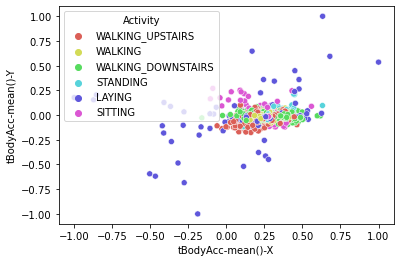

In [17]:
sb.scatterplot(x_train["tBodyAcc-mean()-X"], x_train["tBodyAcc-mean()-Y"], y_train, 
                palette=sb.color_palette('hls', 6))

/etc/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tGravityAcc-mean()-X', ylabel='tGravityAcc-mean()-Y'>

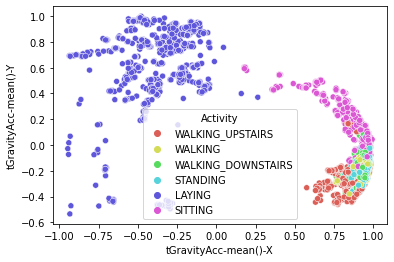

In [18]:
sb.scatterplot(x_train["tGravityAcc-mean()-X"], x_train["tGravityAcc-mean()-Y"], y_train, 
                palette=sb.color_palette('hls', 6))

#### #5: Justify your final choice of hyperparameters based on training and validation accuracies. Comment on overfitting and underfitting.

**Comparing the results:**

|  Model   |  Kernel     | Gamma/Degree | Training Accuracy | Validation Accuracy |Testing Accuracy |
|----------|-------------|--------------|-------------------|---------------------|-----------------|
|svm_linear|Linear       |N/A           |0.9982996089100493 |0.9898028552005439   |0.962673905666779|
|svm_rbf_1 |Rbf          |0.01          |0.9979595306920592 |0.990482664853841    |0.964709874448591|
|svm_rbf_2 |Rbf          |0.1           |1.0                |0.990482664853841    |0.952154733627417|
|svm_rbf_3 |Rbf          |1             |1.0                |0.19782460910944935  |0.184933831014591|
|svm_rbf_4 |Rbf          |10            |1.0                |0.18558803535010196  |0.182219205972175|
|svm_poly_1|Polynomial   |2             |0.9979595306920592 |0.990482664853841    |0.964709874448591|
|svm_poly_2|Polynomial   |4             |1.0                |0.991162474507138    |0.964709874448591|
|svm_poly_3|Polynomial   |10            |1.0                |0.9945615227736234   |0.951136749236511|
|svm_poly_4|Polynomial   |20            |0.9971093351470838 |0.9836845683208701   |0.908042076688157|

**Observations:**  
* The method that best describes the data set is the _**Polynomial Kernel**_.  
    * As observed in the table, this one provides the best Training and Validation Accuracies.
    * Aditionally, doing some exploration with randomly selected features, we can observe in the graphs, this dataset can't be linearly separated.   
* Final choice of parameters: Model = _**svm_poly_3**_.
    * C = 20
    * Degree = 10
    * Validation Acc = 0.9945615227736234
    * Training Acc = 1.0
* Overfitting/Underfitting?
    * _**svm_poly_3**_ model isn't overfitting nor underfitting since both trainng and testing accuracies are high. 

#### #6:  Use the trained SVM algorithm to predict the classes within the test data. Use the score method to display the mean accuracy of these predictions.

In [19]:
#Prediction of the first 100 Activities with best model
svm_poly_3.predict(x_test[0:100])

array(['STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING',
       'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING',
       'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING',
       'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING',
       'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING',
       'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING',
       'STANDING', 'STANDING', 'SITTING', 'SITTING', 'SITTING', 'SITTING',
       'SITTING', 'SITTING', 'SITTING', 'SITTING', 'SITTING', 'SITTING',
       'STANDING', 'STANDING', 'SITTING', 'SITTING', 'SITTING', 'SITTING',
       'SITTING', 'SITTING', 'SITTING', 'SITTING', 'SITTING', 'SITTING',
       'SITTING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING',
       'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING',
       'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING',
       'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING',
       'LAYING', 'WALKING', 'WALK

In [20]:
print('Testing Accuracy: ', svm_poly_3.score(x_test, y_test))

Testing Accuracy:  0.9511367492365117


### Quantitative Analysis of the SVM

* Select the best set of options.
* Give ananalysis using markdown text at the bottom of the notebook for your final SVM model:
    * State the accuracy for the training, validation and testing sets.
    * State the confusion matrix for the testing set
    * Indicate which elements of the confusion matrix are the worst errors for your use case, or if false positives/negatives are more or less the same.    

In [21]:
#Best Model
print('Best Model: svm_poly_3')
# Degree = 10
svm_poly_3 = SVC(kernel='poly', degree=10, C=20, decision_function_shape='ovo', random_state=1)  
svm_poly_3.fit(x_train, y_train)
print('Degree = 10')
print('Training Accuracy: ', svm_poly_3.score(x_train, y_train))
print('Validation Accuracy: ', svm_poly_3.score(x_valid, y_valid))
print('Testing Accuracy: ', svm_poly_3.score(x_test, y_test))

Best Model: svm_poly_3
Degree = 10
Training Accuracy:  1.0
Validation Accuracy:  0.9945615227736234
Testing Accuracy:  0.9511367492365117


In [24]:
print(classification_report(y_test,svm_poly_3.predict(x_test)))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.92      0.94       491
          STANDING       0.93      0.98      0.95       532
           WALKING       0.91      0.96      0.94       496
WALKING_DOWNSTAIRS       0.94      0.92      0.93       420
  WALKING_UPSTAIRS       0.95      0.92      0.94       471

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947



In [22]:
confusion_matrix(y_test, svm_poly_3.predict(x_test))

array([[537,   0,   0,   0,   0,   0],
       [  2, 450,  39,   0,   0,   0],
       [  0,  12, 519,   1,   0,   0],
       [  0,   0,   0, 477,  17,   2],
       [  0,   0,   0,  13, 386,  21],
       [  0,   0,   0,  31,   6, 434]])